In [193]:
import numpy as np
import matplotlib.pyplot as plt

In [194]:
ray_weak_scale = np.genfromtxt('ray_weak_scale.csv', delimiter=',')
dask_weak_scale = np.genfromtxt('dask_weak_scale.csv', delimiter=',')
ray_strong_scale = np.genfromtxt('ray_strong_scale.csv', delimiter=',')
dask_strong_scale = np.genfromtxt('dask_strong_scale.csv', delimiter=',')

In [195]:
def access_data(index, data_metric):
    data_metric = data_metric[index::6]
    sdx, sdy = [], [] #scatter data x and y
    for i in range(len(data_metric)):
        tempx, tempy = [], []
        for j in range(len(data_metric[i])):
            tempx.append(i)
            tempy.append(np.log(data_metric[i][j]))
        tempx = tempx[:6]
        np.sort(tempy)
        tempy = tempy[2:8]
        sdx.extend(tempx)
        sdy.extend(tempy)
    return sdx, sdy

In [199]:
def run_experiments(ray, dask, name):
    titles = ["Read CSV", "Count", "IsNull", "Apply", "Column Access", "Group By"]
    for i in range(6):
        sdxr, sdyr  = access_data(i, ray)
        sdxd, sdyd = access_data(i, dask)
        fig = plt.figure(figsize=(8, 6))
        plt.locator_params(axis="x", integer=True, tight=True)
        plt.title(name + " " + titles[i])
        plt.xlabel("log # of processors")
        plt.ylabel("log time (s)")
        plt.scatter(sdxr, sdyr , c='b', label = "ray")
        plt.scatter(sdxd, sdyd , c='r', label = "dask")
        plt.legend(loc='center left')


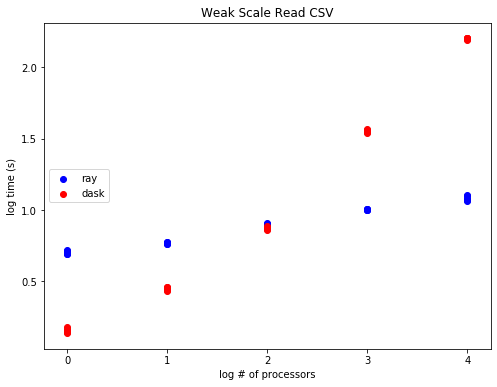

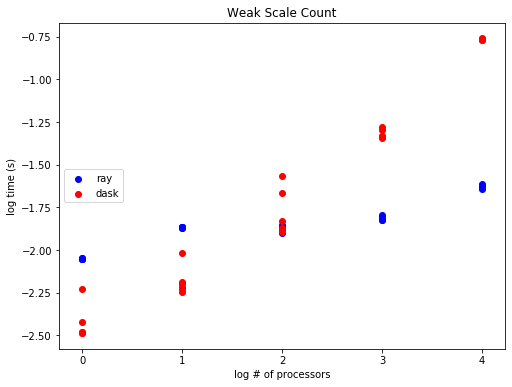

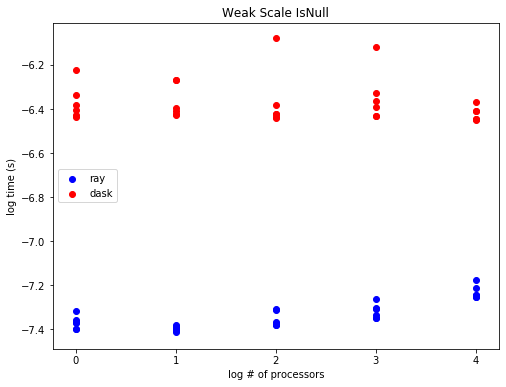

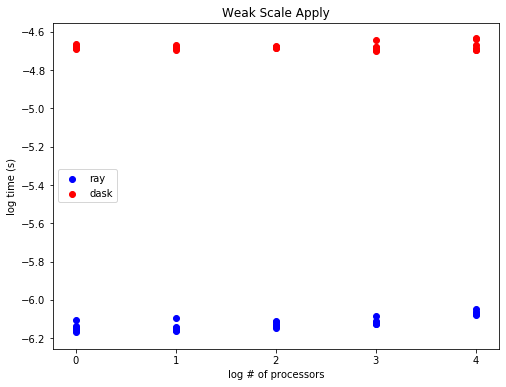

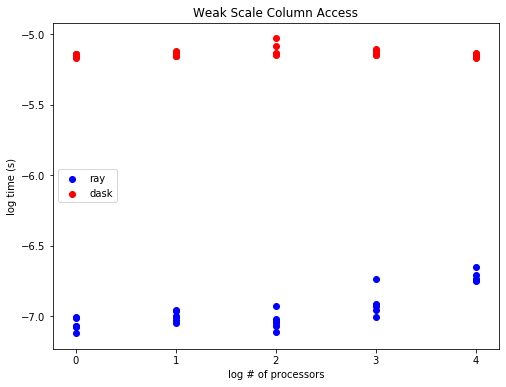

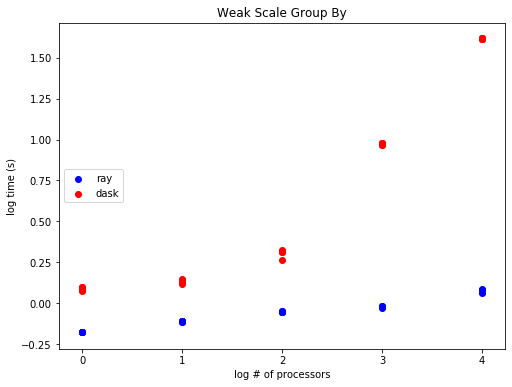

In [200]:
run_experiments(ray_weak_scale, dask_weak_scale, "Weak Scale")

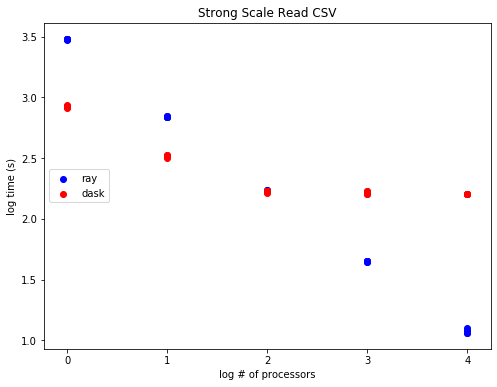

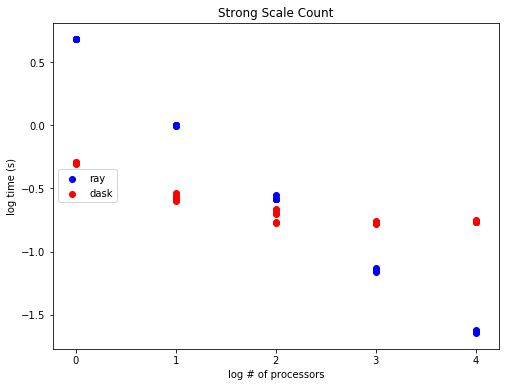

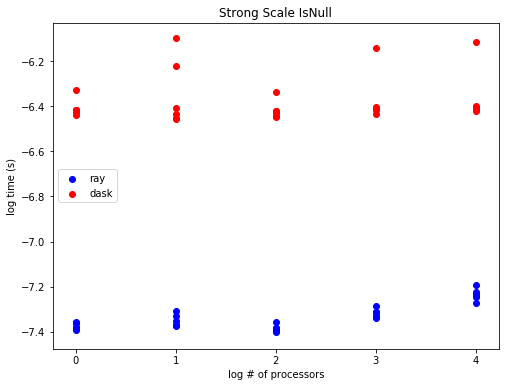

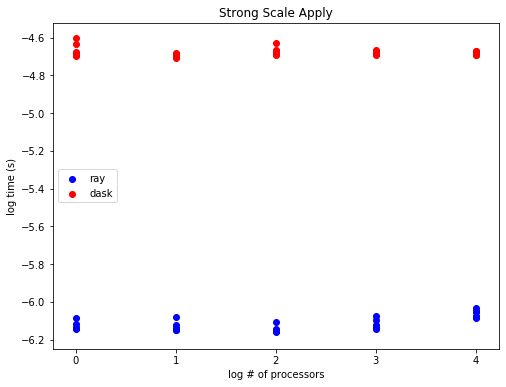

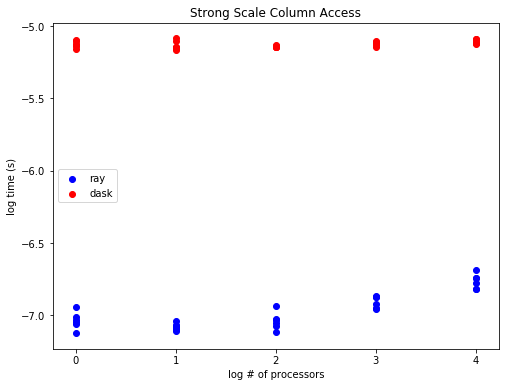

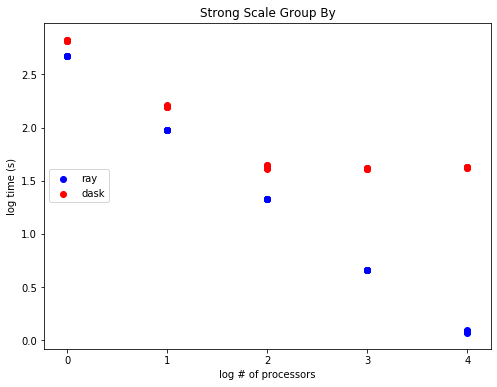

In [201]:
run_experiments(ray_strong_scale, dask_strong_scale, "Strong Scale")